
# "Buying the United Nations?" ## Researching the Implications of US Foreign Aid Dispersment on U.N. Voting Behavior
### Rahul R Birmiwal 
### DATA 512 Final Project. University of Washington
### 12/9/2018

## Package Dependencies

Please ensure all packages are installed on machine of use before importing below. 

*In addition, please ensure scipy is installed*

In [238]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

## Background

The linkage between United States foreign aid and United Nations voting alignment has been a longstanding issue. Most recently, the issue has reignited with the Trump Administration in 2018 pledging to severely cut -- punish -- recipient nations of US foreign aid if said countries do not back US-preferred resolutions at the United Nations:

- "All of these nations that take our money and then they vote against us at the Security Council or they vote against us…at the Assembly…. Well, we’re watching those votes. Let them vote against us; we’ll save a lot.” (President Donald J. Trump. Dec 20, 2017). (https://www.cgdev.org/publication/linking-us-foreign-aid-un-votes-what-are-implications)
- "President Trump and I are pushing to draw a closer connection between US foreign aid and how countries vote at the UN.” – US Ambassador to the UN Nikki Haley. 3/5/2018). https://www.cgdev.org/publication/linking-us-foreign-aid-un-votes-what-are-implications

Yet this quid-pro-quo issue has existed even prior to the current administration's hawkish foreign policy. In particular, with US Cold War policies in the mid 20th century of containment and setting up pro-US puppet governments (think Marshall Plan but more), this issue was crucial. For example, a research report published in the Heritage Foundation: Thirty Years of Voting in the U.N. General Assembly: The U.S. Is Nearly Always in the Minority detail how US Congress has asked for decades concerning the potential disparity between aid and voting alignment -- that surprisingly nations with largest US aid have orthogonal voting alignment to US preferences. This publication comes to the conclusion that: "Indeed, over the past 10 UNGA sessions, on average, 81.9 percent of all development assistance recipients (177 countries in all) voted against the U.S. in a majority of the overall non-consensus votes, and 68.9 percent voted against the U.S. in a majority of the important non-consensus votes." https://www.heritage.org/global-politics/report/thirty-years-voting-the-un-general-assembly-the-us-nearly-always-the. 

The question, therefore, is what is the true relationship between US foreign aid policy and voting alignment, if a clear pattern even exists. 

In particular, we seek the question of correlation and *causality*. Does increased foreign aid *produce*, currently, or in near-term future years increased pro-US alignment. 

## Why Is This Important? 

If *normalized* against all other socio-geo-political-etc external factors, that the US could potentially leverage its powers and offer foreign aid -- yes it does help other nations, but also if it does "buy votes"  in the United Nations -- does it mean the U.N. can be bought? ala Citizens United? Does the United States exercising its world authority likewise stifle the democratic nature of this important institution? 

## Research Question 

**Does increased US foreign aid to a country result in their greater voting "alignment" with pro-US policies/resolutions in the United Nations General Assmebly?**

## What is *Alignment*

A key consideration we need to make is what exactly pro-US "alignment" means. A simple intuition would be that a country aligns with the United States for a particular vote/resolution ID, when said country's vote matches that of the U.S. However, this definition is somewhat myopic; in particular there are two nuances we need to examine: 

Before doing so, please read this wonderful and insightful article regarding the political tug-of-war associated with foreign aid allotments. https://www.cgdev.org/publication/linking-us-foreign-aid-un-votes-what-are-implications. 
In particular, please turn attention to two key passages, shown below. These serve as context for the discussion regarding non-important votes and the "abstain" vote thereafter: 

- "Focusing on important votes: The United States doesn’t have high stakes in many of the issues put to a vote in UNGA, and pressuring countries is costly, in terms of both resources and political capital. The United States is far more likely to invest in securing alignment—as well as care about nonalignment—for votes that are important to US interests.[9] This is typically a small subset of total votes. The 2016 State Department report flags just 14 of 99 UNGA votes as important."

- "As the State Department acknowledges, abstentions (and absences) can be difficult to interpret, but they can make a meaningful difference in gauging alignment.[10] The trick is how to assign meaning. One interpretation is that absence or abstention is an oppositional move. If a vote will be close or if the United States’ goal is to avoid isolation on a particular issue, abstentions don’t help.[11] Another interpretation of absence or abstention is that it is non-oppositional. Abstaining or declining to vote may be a politically palatable way for countries to assuage citizen demands at home while also not actively opposing the United States. The United States may welcome abstention or absence from a country that would otherwise actively oppose its position."


1. **Non-Important Votes**: These are votes corresponding to resolutions/amendements/etc. that the U.S. State Deparment deemed non-consequential. The question is should these minor/very minor votes be considered in our analysis, or is doing so the equivalent of injecting white noise into a system? Taking the stance from the first quotation above, we will not be using non-important votes in the analysis. We believe that in order to measure pro-US alignment, it is apropos to consider resolutions marked by the State Department as significant...presumeably to U.S. interests
2. **Is "Abstain" a Non-Oppositionary Position**? The other consideration is whether the abstain/exclude vote should be automatically (or not) considered as aligned (not-aligned) with the U.S. If we are only considering important votes, we might be unncessarily punishing "fringe" countries that choose to abstain: it is quite plausible that "neutral" or "enemy" nations can feel political pressured to align with the United States in order to prevent souring relations and in this regard the "abstain" vote is their political "out" and recourse. This should not be punished. Hence we will use any "Abtain" or "Exclude" position as automatically aligning with the U.S. 

## Data Sources Information 

Data comes from two sources. We need United Nations General Assembly (UNGA) voting records and data regarding US foreign aid.

### UNGA Voting Data 
The first comes from https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12379 which contains record data as well as voting description data/"metadata." This is for the time period 1946-2017. A more complete description of these datasets can be found in the 'Codebook.pdf' in this project's repository

**Required Citations:**

- Inter-university Consortium for Political and Social Research. United Nations Roll Call Data, 1946-1985. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 1992-02-16. https://doi.org/10.3886/ICPSR05512.v1
- Erik Voeten "Data and Analyses of Voting in the UN General Assembly" Routledge Handbook of International Organization, edited by Bob Reinalda (published May 27, 2013). Available at SSRN: http://ssrn.com/abstract=2111149 *Second citation made at the request indicated by author at the Codebook found at the above link

We detail the schemas here: 

**Vote Records Data**

rcid: resolution ID, can be used as foreign key to other datasets
vote_type: i.e. yes/no/abstain/etc
ccode: country code
session: UNGA (United Nations General Assembly) session number (1-99)

**Vote Description Data**

rcid: resolution ID, can be used as foreign key to other datasets
session: UNGA session date
short: short description
descr: longer description
important: whether said resolution was deemed "important" by U.S. State Department

**Issue codes (non-exclusive):**

ME: Votes relating to the Israeli-Palestinian conflict
NU: Votes relating to nuclear weapons and disarmament/arms control
CO: Votes relating to colonialism
HR: Votes relating to human rights
EC: Votes relating to economic development

### US Foreign Aid Data 

**Required Citation**: 

-Title: Foreign Aid Explorer: The official record of U.S. foreign aid

-Author: U.S. Agency for International Development (USAID)

US foreign aid data comes from the US Department for Foreign Aid @ USAID.gov. https://explorer.usaid.gov/about.html#tab-about. The data set lists all individual foreign aid transactions 1946-2017. The data can be downloaded from: https://explorer.usaid.gov/data.html under "complete dataset." 

## Licenses

- The UN Voting data is released under a CC0 "Public Domain Dedication" license. It is expected, furthermore, that all data used from Harvard Dataverse and child sites be subject to the following community norms found at https://dataverse.org/best-practices/dataverse-community-norms.
- USAID.gov data is released under a "Partner Data License" (https://www.usaid.gov/data/license-data-created-usaid-partners) which "which include the right to reproduce, publish, or otherwise use the data, through a Creative Commons Attribution-No Derivatives 4.0 International License"


## Data Preparation 

**Note**: Before doing this step, please follow the data download instructions on this project's README.md, as the data files are too large to be simply hosted on this repository. Please ensure that upon download that those properly-named data files are in the same directory as *this* notebook file. 

In this section, we describe how the original datasets and transformed and prepared for the later analysis. By the end of this section, two key dataframes will be established: 
1. **align_aid_by_year**: Dataframe of schema (Year, Country, Aid, Alignment) where Aid and Alignment are totals for that country for that year
2. **align_aid_totals**: Dataframe of schema (Country, Aid, Alignment) where Aid and Alignment are totals for the entire time period in question, by country (since we will be using important votes, this will be ca. 1985 to 2017).
3. **align_aid_historical**: Dataframe of (Year, Aid, Alignment) where Aid and Alignment are totals for each year, worldwide aggregated. 

Read in the **voting records** dataset, **descriptions** dataset and **US foreign aid transactions** datasets. These all are in this project's repository 

In [239]:
# voting 
vote_df = pd.read_csv('UNVotes1-72.tab.tsv', sep='\t')

# descriptions
des_df = pd.read_csv('DescriptionsUN1-72.csv')

# foreign aid 
aid_df = pd.read_csv('us_foreign_aid_complete.csv')

/Users/rahulbirmiwal/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


View heads of each of the datafrmes...

In [240]:
vote_df.head()

,rcid,ccode,session,member,vote,Country,Countryname,year
0,3.0,2,1.0,1.0,1,USA,United States of America,1946
1,3.0,20,1.0,1.0,3,CAN,Canada,1946
2,3.0,31,1.0,NaN,9,BHS,Bahamas,1946
3,3.0,40,1.0,1.0,1,CUB,Cuba,1946
4,3.0,41,1.0,1.0,1,HTI,Haiti,1946


In [241]:
des_df.head()

,session,rcid,abstain,yes,no,importantvote,date,unres,amend,para,short,descr,me,nu,di,hr,co,ec
0,1,3,4,29,18,0,1/1/1946,R/1/66,1.0,0.0,"AMENDMENTS, RULES OF PROCEDURE",TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...,0.0,0.0,0.0,0.0,0.0,0
1,1,4,8,9,34,0,1/2/1946,R/1/79,0.0,0.0,SECURITY COUNCIL ELECTIONS,TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON ...,0.0,0.0,0.0,0.0,0.0,0
2,1,5,1,28,22,0,1/4/1946,R/1/98,0.0,0.0,VOTING PROCEDURE,TO ADOPT THE KOREAN PROPOSAL THAT INVALID BALL...,0.0,0.0,0.0,0.0,0.0,0
3,1,6,10,12,27,0,1/4/1946,R/1/107,0.0,0.0,DECLARATION OF HUMAN RIGHTS,TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...,0.0,0.0,0.0,1.0,0.0,0
4,1,7,0,25,18,0,1/2/1946,R/1/295,1.0,0.0,GENERAL ASSEMBLY ELECTIONS,TO ADOPT A 6TH COMMITTEE AMENDMENT (A/14) TO T...,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
aid_df.head()

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,implementing_agency_id,implementing_agency_acronym,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount,USG_sector_id,USG_sector_name,submission_id
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2011,9941000000,10731991839,3,Stabilization Operations and Security Sector R...,28
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2012,9243000000,9799467226,3,Stabilization Operations and Security Sector R...,28
2,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,3,Disbursements,2011,7840175215,8464007285,3,Stabilization Operations and Security Sector R...,28
3,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,3,Disbursements,2013,7764310985,8095048196,3,Stabilization Operations and Security Sector R...,28
4,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,7,DOD,...,NaN,NaN,2,Obligations,2013,6928000000,7223112779,3,Stabilization Operations and Security Sector R...,28


### Step 1: Create Aid by Country & Year Table

We need to create a table of schema: (year, country, aid-received). This is because the *aid_df* contain transactions that may/often occur many times per year. We do this below: 

**Note: We use the 'constant_amount' column as that is the dollar amount of aid, adjusted for inflation (i.e. in constant currency)**

In [243]:
fiscal_df = aid_df.groupby(['country_name', 'fiscal_year'])['constant_amount'].agg('sum').reset_index()
fiscal_df.head()

,country_name,fiscal_year,constant_amount
0,Afghanistan,1964,936644
1,Afghanistan,1965,400486
2,Afghanistan,1966,684626
3,Afghanistan,1967,919849
4,Afghanistan,1969,1427711


### Step 2: Create Country-Info Table

We need to create table (that will be used in the later parts of this analysis) regarding income and geographic information for each country. We do this below: 

In [244]:
country_info_df = aid_df[['country_name', 'income_group_name', 'region_name']].drop_duplicates()
country_info_df.head()

,country_name,income_group_name,region_name
0,Afghanistan,Low Income Country,South and Central Asia
13,Iraq,Upper Middle Income Country,Middle East and North Africa
21,Poland,High Income Country,Europe and Eurasia
23,United Kingdom,High Income Country,Europe and Eurasia
30,Vietnam (former South),NaN,East Asia and Oceania


### Step 3: Create Table of US Voting Data and *Important-Vote*  For Each *'rcid'*

The *vote_df* voting data contains voting data for each country for each rcid (roll-call/resolution ID). As a precursor to determine voting alignmnt with the United States, we need to extract US voting behavior for each of these rcids. Another set of information we need is whether a given 'rcid' is classified by the US State Department as an *important vote* (listed as 1 in the importantvote column). Furthermore, we need to know if each country votes (including abstain/exclude) for all rcids: 

In [245]:
total_votes_by_cntry = vote_df.groupby(['Country']).size().reset_index()
total_votes_by_cntry.tail()

,Country,0
193,YMD,4704
194,YUG,5598
195,ZAF,5598
196,ZMB,5598
197,ZWE,5525


In [246]:
max(total_votes_by_cntry[0])

5598

We note that the maximum number of voting 'situations' (i.e unique rcids) is 5598. Clearly, not all countries participate in every one of these UNGA sessions 1946-2017. 

With this in mind, we extract US votes and important votes, and merge these together to create a *us_votes* dataframe: 

In [247]:
# generate important votes
imp_df = des_df[['rcid', 'importantvote']]
imp_df.head()

,rcid,importantvote
0,3,0
1,4,0
2,5,0
3,6,0
4,7,0


In [248]:
# generate US voting data table 
us_votes = vote_df[vote_df['Country']=='USA']
us_votes = us_votes.merge(imp_df,how='outer',on='rcid')
us_votes.head()

,rcid,ccode,session,member,vote,Country,Countryname,year,importantvote
0,3.0,2.0,1.0,1.0,1.0,USA,United States of America,1946.0,0
1,4.0,2.0,1.0,1.0,3.0,USA,United States of America,1946.0,0
2,5.0,2.0,1.0,1.0,3.0,USA,United States of America,1946.0,0
3,6.0,2.0,1.0,1.0,3.0,USA,United States of America,1946.0,0
4,7.0,2.0,1.0,1.0,3.0,USA,United States of America,1946.0,0


In [249]:
total_us_votes = us_votes.shape[0]
total_us_votes

5602

We see that there have been 5602 instances where the US has participated in UNGA sessions, which is 4 greater than the 5598 maximum stated earlier. I do not know why this is, but the difference here is very negligible. 

Let's also see the number of UNGA sessions that involved an important vote: 

In [250]:
total_us_important_votes = sum(us_votes['importantvote'])
total_us_important_votes

411

Now select important columns (i.e. we don't need session or ccode) and merge with the original *vote_df* such that we obtain, for all rcid, voting record for each nation, as well as that of the United States (again, on a per-row basis), such that voting alignment can be duly determined

In [251]:
us_votes = us_votes[['rcid', 'vote', 'Country', 'importantvote']]
master_votes = vote_df.merge(us_votes, how='outer',left_on='rcid',right_on='rcid')

And now join on *fiscal_df*, such that we have the corresponding US foreign aid given to the country (on the left-hand-side of the table) for that given year. 

In [252]:
master_votes = master_votes.merge(fiscal_df, how='inner', left_on=['Countryname', 'year'], \
                                  right_on=['country_name', 'fiscal_year'])
master_votes = master_votes.rename(index=str, columns={'constant_amount':'US-Aid-Const', 
    'vote_x':'cntry_vote', 'vote_y':'US_vote', 'Country_x':'Voting_cntry', 'Country_y': 'USA'})


In [253]:
master_votes.head()

,rcid,ccode,session,member,cntry_vote,Voting_cntry,Countryname,year,US_vote,USA,importantvote,country_name,fiscal_year,US-Aid-Const
0,239.0,211.0,5.0,1.0,3.0,BEL,Belgium,1950,3.0,USA,0,Belgium,1950,303427
1,240.0,211.0,5.0,1.0,3.0,BEL,Belgium,1950,3.0,USA,0,Belgium,1950,303427
2,241.0,211.0,5.0,1.0,3.0,BEL,Belgium,1950,3.0,USA,0,Belgium,1950,303427
3,242.0,211.0,5.0,1.0,3.0,BEL,Belgium,1950,3.0,USA,0,Belgium,1950,303427
4,243.0,211.0,5.0,1.0,3.0,BEL,Belgium,1950,3.0,USA,0,Belgium,1950,303427


### Step 4: Alignment and Important Votes

As per explanation earlier, we define pro-US alignment as a *cntry_vote* that is in ('Abstain', 'Exclude') or where *cntry_vote* matches *US_vote*. We generate a column for "Align." We also remove out the non-important votes, as per prior discussion. 

In [254]:
x = master_votes # to don't touch original dataset
x['Align'] = np.where((x['cntry_vote']==x['US_vote']) | (x['cntry_vote']==2) | (x['cntry_vote']==8), 1, 0)
x = x.query('importantvote==1')
x.head()

,rcid,ccode,session,member,cntry_vote,Voting_cntry,Countryname,year,US_vote,USA,importantvote,country_name,fiscal_year,US-Aid-Const,Align
64285,2491.0,41.0,38.0,1.0,1.0,HTI,Haiti,1983,1.0,USA,1,Haiti,1983,1545709,1
64286,2492.0,41.0,38.0,1.0,2.0,HTI,Haiti,1983,3.0,USA,1,Haiti,1983,1545709,1
64291,2497.0,41.0,38.0,1.0,1.0,HTI,Haiti,1983,1.0,USA,1,Haiti,1983,1545709,1
64298,2504.0,41.0,38.0,1.0,1.0,HTI,Haiti,1983,3.0,USA,1,Haiti,1983,1545709,0
64304,2510.0,41.0,38.0,1.0,1.0,HTI,Haiti,1983,3.0,USA,1,Haiti,1983,1545709,0


### Step 5: Aggregation by Year

We now need to determine, by year and by country, total alignments, and total aid received. 

In [255]:
align_aid_by_year = x.groupby(['Countryname', 'year']).agg('sum')[[ 'Align', 'US-Aid-Const']].reset_index()
align_aid_by_year.head()

,Countryname,year,Align,US-Aid-Const
0,Afghanistan,1990.0,5,1865248
1,Afghanistan,1991.0,6,924130
2,Afghanistan,1992.0,10,9947856
3,Afghanistan,1993.0,8,481715
4,Afghanistan,1994.0,8,543960


### Step 6: Aggregation by Country

Now aggregate the above dataframe by country, to produce **align_aid_total**

In [256]:
align_aid_total = align_aid_by_year.groupby(['Countryname']).agg('sum')[[ 'Align', 'US-Aid-Const']].reset_index()
align_aid_total.head()

,Countryname,Align,US-Aid-Const
0,Afghanistan,160,7987587106
1,Albania,276,2638958726
2,Algeria,148,656221940
3,Angola,193,3809051617
4,Antigua and Barbuda,244,138297727


### Step 7: Aggregation by Year

Now also aggregate by year, to produce **align_aid_historical**


In [257]:
align_aid_historical = align_aid_by_year.groupby('year').agg('sum')[[ 'Align', 'US-Aid-Const']].reset_index()

## Various Structural Modeling 

This section discussed various methods/approaches to tackling the research question of potential relationship(s) and causality between aid received, and pro-US alignment in the UNGA. This section is an exploratory data analysis that will hopefully produce a fair and unbiased structural model of the data that can then be appropriately processed. 

### Exhibit 1

The simplest view of our data is to graph aid and alignment over time:

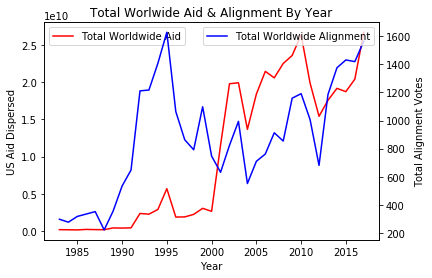

In [258]:
y1, y2 = align_aid_historical['US-Aid-Const'],  align_aid_historical['Align']
x = align_aid_historical['year']
fig, ax = plt.subplots()
ax.plot(x,y1,color='r',label='Total Worldwide Aid')
ax.set_ylabel('US Aid Dispersed')
ax2 = ax.twinx()
ax2.plot(x,y2,color='b',label='Total Worldwide Alignment')
ax2.set_ylabel('Total Alignment Votes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Total Worlwide Aid & Alignment By Year')
ax.set_xlabel('Year')
plt.show()

There are some important we observations we can make from the above graph: 
1. If the causality thesis were to hold, visually one might like to see the blue line succeed the red line -- that is alignment lags aid. Perhaps that is indeed the case here, as we see a sharp spike in US foreign aid ca. 2000. Shortly after, the downtrend in alignment from 1990-2000 is reversed and an uptrend begins. So perhaps this is indeed the case...
2. But...that huge spike in US foreign aid ca. 2000 *itself* is problematic? Why? Because that spike is attributed to renewed US involvement in the Middle East with wars in Afghanistan and Iraq. In fact, the magnitude of this spike can be clearly shown if we zoom out to 1946-2017 time window, which is done by including non-important votes into the dataset. To do this, we recreate the Data Preparation steps above to include non-important votes. This is done below: 

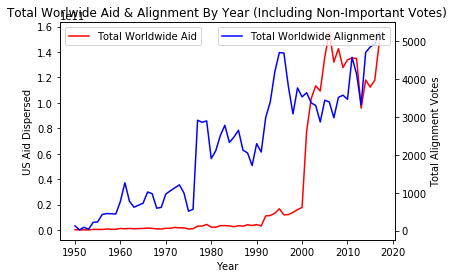

In [259]:
%matplotlib inline
x = master_votes
align_aid_by_year_all = x.groupby(['Countryname', 'year']).agg('sum')[[ 'Align', 'US-Aid-Const']].reset_index()
align_aid_total_all = align_aid_by_year_all.groupby(['Countryname']).agg('sum')[[ 'Align', 'US-Aid-Const']].reset_index()
align_aid_historical_all = align_aid_by_year_all.groupby('year').agg('sum')[[ 'Align', 'US-Aid-Const']].reset_index()



y1, y2 = align_aid_historical_all['US-Aid-Const'],  align_aid_historical_all['Align']
x = align_aid_historical_all['year']
fig, ax = plt.subplots()
ax.plot(x,y1,color='r',label='Total Worldwide Aid')
ax.set_ylabel('US Aid Dispersed')
ax2 = ax.twinx()
ax2.plot(x,y2,color='b',label='Total Worldwide Alignment')
ax2.set_ylabel('Total Alignment Votes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Total Worlwide Aid & Alignment By Year (Including Non-Important Votes)')
ax.set_xlabel('Year')
plt.show()

Clearly, that jump in worlwide US foreign aid ca. 2000 is astonishing! This points to an underlying issue with **bias** in our dataset and relationships between the data. There are "hidden" historical-socio-geo-political-ethnographic factors that account for aid and alignment. That is, we must consider the data on a country-by-country basis. What is the country is war torn? In a drought? Has political unrest or culturally different from the US? What about the pre-existing global alliances? NATO will vote for NATO. Will the former Soviet bloc side with the western world and the United States, or will biased grudges still hold? All these issues are potential biases that can account for varying levels of alignment -- as a result with this biased dataset, one cannot safely say foreign aid *alone* can yield increased / decreased pro-US alignment.  

### Exhibit 2

As a result of the above considerations, let's switch models and explore the data on a country-by-country level. First, however, we need to append two new columns to our dataframes. Instead of dealing in absolute alignment numbers, it is more appropriate to deal with percentage alignment with the United States (i.e. an alignment of 50 might seem low, but it might actually correspond to a high alignment-percentage). 

We compute the alignment percentage (for important vote) by dividing total alignment values by the total important US voting instances. 

In [260]:
align_aid_total['Imp_Align_Percentage'] = (align_aid_total['Align']/total_us_important_votes)*100

In [261]:
align_aid_total.head(5)

,Countryname,Align,US-Aid-Const,Imp_Align_Percentage
0,Afghanistan,160,7987587106,38.929440
1,Albania,276,2638958726,67.153285
2,Algeria,148,656221940,36.009732
3,Angola,193,3809051617,46.958637
4,Antigua and Barbuda,244,138297727,59.367397


Let's plot the data above as a scatter plot. We will be using the *seaborn* library (https://seaborn.pydata.org) for plotting due to its ease of use in clustering, doing regression plots, etc. 

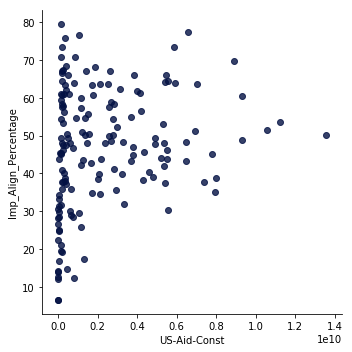

In [263]:

p1 = sns.lmplot( x="US-Aid-Const", y="Imp_Align_Percentage", data=align_aid_total, fit_reg=False,  legend=True) 

We see perhaps that there is some sort of positive power/logarthimic relationship between aid dispersed and alignment percentage. Let us actually try and model the data as a logarthmic function using python's `scipy.optimize.curve_fit()` functionality. The below code is adapted from the documentation @ https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html. 

/Users/rahulbirmiwal/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


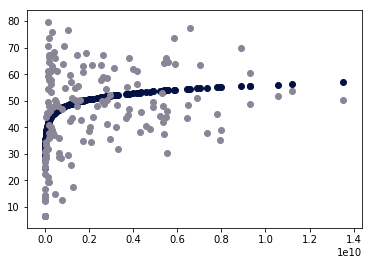

In [264]:
from scipy.optimize import curve_fit

x, y = align_aid_total['US-Aid-Const'], align_aid_total['Imp_Align_Percentage']

plt.figure()
def l( x, a, b, c, d ):
    return a*np.log( b*x + c ) + d

popt, pcov = curve_fit(l, x, y)
plt.scatter(x, l(x, *popt))
plt.scatter(x,y)


Let us compute the coefficient of determination R^2 for the above non-linear regression fit. 

In [265]:

# https://stackoverflow.com/questions/18767523/fitting-data-with-numpy
residuals = y- l(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)



0.22083851877295313


Although 22% technically isn't great, it is much better than an OLS model fitted with intercept (as we assume an aid-received of zero should not correspond to a 0% alignment percentage). We fit a model below using `statsmodels.api` @ (https://www.statsmodels.org/stable/index.html. And then plot using seaborn. This version has an R^2 of only ~4%. 

In [266]:
import statsmodels.api as sm

# add constant and fit
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Imp_Align_Percentage   R-squared:                       0.044
Model:                              OLS   Adj. R-squared:                  0.038
Method:                   Least Squares   F-statistic:                     7.182
Date:                  Mon, 10 Dec 2018   Prob (F-statistic):            0.00815
Time:                          04:45:54   Log-Likelihood:                -661.67
No. Observations:                   159   AIC:                             1327.
Df Residuals:                       157   BIC:                             1333.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.0513      1.622     27.159      0.000      40.848      47.255
US-Aid-Const  1.229e-09   4.58e-10      2.680      0.008    3.23e-10    2.13e-09
==============================================================================
Omnibus:                        2.736   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.194
Skew:                          -0.153   Prob(JB):                        0.334
Kurtosis:                       2.512   Cond. No.                     4.63e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/rahulbirmiwal/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


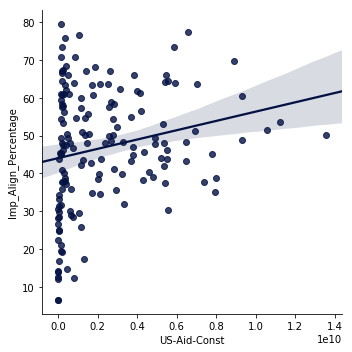

In [267]:
p1 = sns.lmplot( x="US-Aid-Const", y="Imp_Align_Percentage", data=align_aid_total, fit_reg=True,  legend=True)

The conclusion of Exhibit 2 is that there does exist a positive correlation between aid received, and alignment percentage. We see that perhaps there is some positive nonlinear relationship between aid and alignment. However once again we see a large cluster of countries who receive very little aid, but whose alignment percentages vary **widely**. 

In fact once again this structural model of the data is dotted with hidden bias. If we cluster the scatter plot by income group, we will see below that such positive relationship is highly correlated with income (i.e. a high-income country is unlikely to recieve large US aid in the first place...). Furthermore in fact if one were to examine this high-income region, we would see that the countries with low alignment percentage are Middle Eastern/North African countries such as Saudi Arabia, Yemen; those with high alignment percentage are clearly US allies such as Australia and Isreal. 

<Figure size 432x288 with 0 Axes>

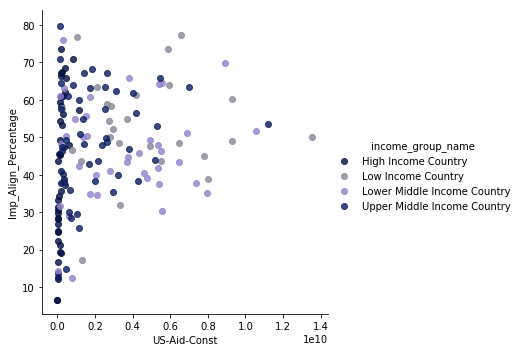

In [268]:
%matplotlib inline 
plt.figure()
R = align_aid_total.merge(country_info_df, left_on='Countryname', right_on='country_name').sort_values(by='income_group_name')
color_scheme = ['#031143', '#8A8697', '#9382CC', '#091C5F']
sns.set_palette(palette=color_scheme)
sns.lmplot( x="US-Aid-Const", y="Imp_Align_Percentage", data=R, fit_reg=False, \
           hue='income_group_name',  legend=True)



The conclusion is that we need a slightly different model to remove this bias. 

### Exhibit 3

**Removing Bias** 

One method for removing bias is to "condition on it." Akin to setting up control groups in a scientific experiment, conditioning on the right variables will normalize "domains" of the dataset such that they can be appropriately compared and contrasted. A very good write-up regarding bias in data science can be read @ https://medium.com/causal-data-science/understanding-bias-a-pre-requisite-for-trustworthy-results-ee590b75b1be. 

There is an infinite number of potential historical-socio-geo-political-ethnographic biases that could be accounted for. For the scope of this project, it is impossible to account/control for all of these. For the sake of this analysis we assume that income-group and sub-region (geographic location) is a suitable, best-effort generalized proxy for all these externalities. Perhaps this is a naive assumption, and if there was more time allocated for this work, we could join in numerous other external datasets to better condition on. However, for now, this assumption will have to suffice. 

We perform the conditoning by grouping-by countries by income group, then do a secondary grouping-by on region-name. We do this by year, such that we have a dataset where we have, for each year, the average alignment number and average aid received for that income-region cluster. 

In [269]:
W = align_aid_by_year.merge(country_info_df,how='inner',left_on='Countryname',right_on='country_name')
by_inc_reg = W.groupby(['year','income_group_name','region_name']).agg('mean')[['Align', 'US-Aid-Const']].reset_index()

high_inc = by_inc_reg[by_inc_reg['income_group_name']=='High Income Country']
med_inc = by_inc_reg[by_inc_reg['income_group_name']=='Upper Middle Income Country']
low_inc = by_inc_reg[by_inc_reg['income_group_name']=='Lower Middle Income Country']
bad_inc = by_inc_reg[by_inc_reg['income_group_name']=='Low Income Country']




In [270]:

high_inc_EO = high_inc[high_inc['region_name']=='East Asia and Oceania']
high_inc_SSA = high_inc[high_inc['region_name']=='Sub-Saharan Africa']
high_inc_MeNA = high_inc[high_inc['region_name']=='Middle East and North Africa']
high_inc_WH = high_inc[high_inc['region_name']=='Western Hemisphere']

In [271]:

low_inc_EO = low_inc[low_inc['region_name']=='East Asia and Oceania']
low_inc_SSA = low_inc[low_inc['region_name']=='Sub-Saharan Africa']
low_inc_MeNA = low_inc[low_inc['region_name']=='Middle East and North Africa']
low_inc_WH = low_inc[low_inc['region_name']=='Western Hemisphere']

In [272]:

med_inc_EO = med_inc[med_inc['region_name']=='East Asia and Oceania']
med_inc_SSA = med_inc[med_inc['region_name']=='Sub-Saharan Africa']
med_inc_MeNA = med_inc[med_inc['region_name']=='Middle East and North Africa']
med_inc_WH = med_inc[med_inc['region_name']=='Western Hemisphere']

In [273]:

bad_inc_EO = bad_inc[bad_inc['region_name']=='East Asia and Oceania']
bad_inc_SSA = bad_inc[bad_inc['region_name']=='Sub-Saharan Africa']
bad_inc_MeNA = bad_inc[bad_inc['region_name']=='Middle East and North Africa']
bad_inc_WH = bad_inc[bad_inc['region_name']=='Western Hemisphere']

In [274]:
bad_inc_SSA.head()

,year,income_group_name,region_name,Align,US-Aid-Const
6,1983.0,Low Income Country,Sub-Saharan Africa,4.375000,3.436648e+06
23,1984.0,Low Income Country,Sub-Saharan Africa,3.250000,2.299637e+06
42,1985.0,Low Income Country,Sub-Saharan Africa,5.428571,2.823272e+06
57,1986.0,Low Income Country,Sub-Saharan Africa,4.666667,5.740629e+06
73,1987.0,Low Income Country,Sub-Saharan Africa,5.500000,4.019077e+06


With these 16 datasets that are now hopefully at little less biased, we now seek to examine our research question regarding causalitty. We now plot, for each income group, the alignment and aid, vs. year, for each sub-region. The goal here is to determine if alignment *lags* aid. 

The following code snippet is used to generate a graph of income group given region . Here we show for example graphing alignment and aid, vs year, for the low income group in the western hemisphere. 

### High Income Region

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


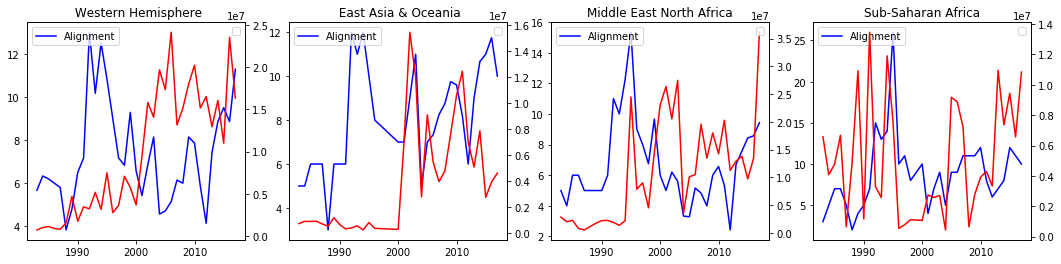

In [275]:
%matplotlib inline
fig, axarr= plt.subplots(1,4)
fig.set_size_inches(18, 4)
axarr[0].set_title(" Western Hemisphere")
x,y,z = high_inc_WH['year'], high_inc_WH['Align'], high_inc_WH['US-Aid-Const']
axarr[0].plot(x,y ,label='Alignment',color='b')
axarr[0].legend(loc='upper left')
ax2 = axarr[0].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[1].set_title(" East Asia & Oceania")
x,y,z = high_inc_EO['year'], high_inc_EO['Align'], high_inc_EO['US-Aid-Const']
axarr[1].plot(x,y ,label='Alignment',color='b')
axarr[1].legend(loc='upper left')
ax2 = axarr[1].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[2].set_title("Middle East North Africa")
x,y,z = high_inc_MeNA['year'], high_inc_MeNA['Align'], high_inc_MeNA['US-Aid-Const']
axarr[2].plot(x,y ,label='Alignment',color='b')
axarr[2].legend(loc='upper left')
ax2 = axarr[2].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[3].set_title("Sub-Saharan Africa")
x,y,z = high_inc_SSA['year'], high_inc_SSA['Align'], high_inc_SSA['US-Aid-Const']
axarr[3].plot(x,y ,label='Alignment',color='b')
axarr[3].legend(loc='upper left')
ax2 = axarr[3].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')


plt.show()

### Upper Middle Income Region

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


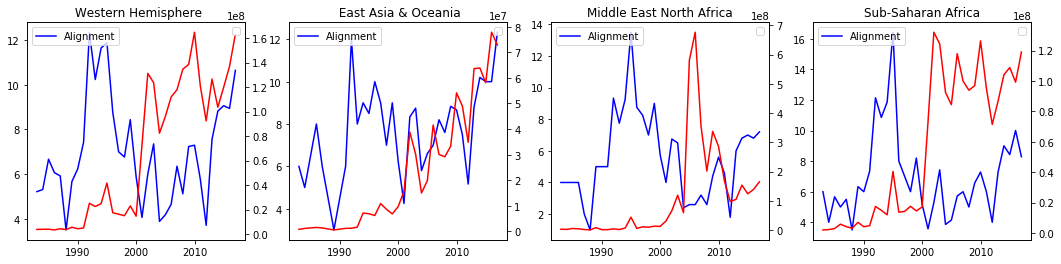

In [276]:
%matplotlib inline
fig, axarr= plt.subplots(1,4)
fig.set_size_inches(18, 4)
axarr[0].set_title(" Western Hemisphere")
x,y,z = med_inc_WH['year'], med_inc_WH['Align'], med_inc_WH['US-Aid-Const']
axarr[0].plot(x,y ,label='Alignment',color='b')
axarr[0].legend(loc='upper left')
ax2 = axarr[0].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[1].set_title(" East Asia & Oceania")
x,y,z = med_inc_EO['year'], med_inc_EO['Align'], med_inc_EO['US-Aid-Const']
axarr[1].plot(x,y ,label='Alignment',color='b')
axarr[1].legend(loc='upper left')
ax2 = axarr[1].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[2].set_title("Middle East North Africa")
x,y,z = med_inc_MeNA['year'], med_inc_MeNA['Align'], med_inc_MeNA['US-Aid-Const']
axarr[2].plot(x,y ,label='Alignment',color='b')
axarr[2].legend(loc='upper left')
ax2 = axarr[2].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[3].set_title("Sub-Saharan Africa")
x,y,z = med_inc_SSA['year'], med_inc_SSA['Align'], med_inc_SSA['US-Aid-Const']
axarr[3].plot(x,y ,label='Alignment',color='b')
axarr[3].legend(loc='upper left')
ax2 = axarr[3].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')


plt.show()

### Low Middle Income Region

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


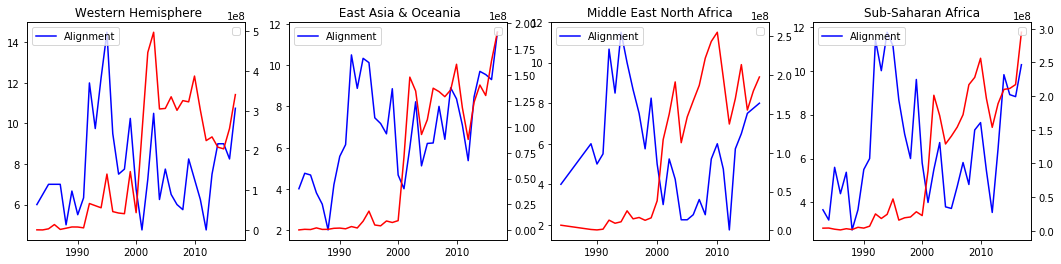

In [277]:
%matplotlib inline
fig, axarr= plt.subplots(1,4)
fig.set_size_inches(18, 4)
axarr[0].set_title(" Western Hemisphere")
x,y,z = low_inc_WH['year'], low_inc_WH['Align'], low_inc_WH['US-Aid-Const']
axarr[0].plot(x,y ,label='Alignment',color='b')
axarr[0].legend(loc='upper left')
ax2 = axarr[0].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[1].set_title(" East Asia & Oceania")
x,y,z = low_inc_EO['year'], low_inc_EO['Align'], low_inc_EO['US-Aid-Const']
axarr[1].plot(x,y ,label='Alignment',color='b')
axarr[1].legend(loc='upper left')
ax2 = axarr[1].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[2].set_title("Middle East North Africa")
x,y,z = low_inc_MeNA['year'], low_inc_MeNA['Align'], low_inc_MeNA['US-Aid-Const']
axarr[2].plot(x,y ,label='Alignment',color='b')
axarr[2].legend(loc='upper left')
ax2 = axarr[2].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[3].set_title("Sub-Saharan Africa")
x,y,z = low_inc_SSA['year'], low_inc_SSA['Align'], low_inc_SSA['US-Aid-Const']
axarr[3].plot(x,y ,label='Alignment',color='b')
axarr[3].legend(loc='upper left')
ax2 = axarr[3].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')


plt.show()

### Worst Income Region

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


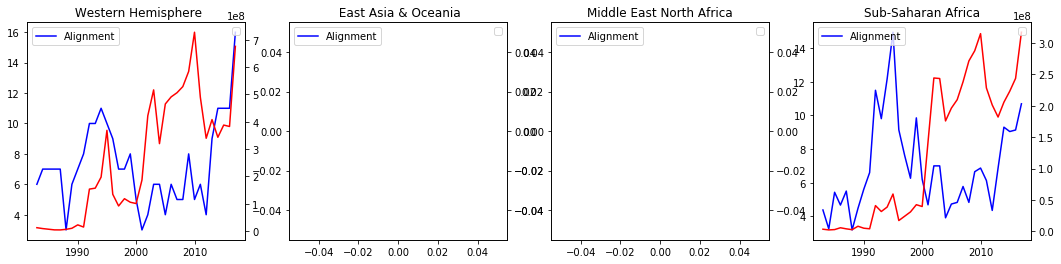

In [278]:
%matplotlib inline
fig, axarr= plt.subplots(1,4)
fig.set_size_inches(18, 4)
axarr[0].set_title(" Western Hemisphere")
x,y,z = bad_inc_WH['year'], bad_inc_WH['Align'], bad_inc_WH['US-Aid-Const']
axarr[0].plot(x,y ,label='Alignment',color='b')
axarr[0].legend(loc='upper left')
ax2 = axarr[0].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[1].set_title(" East Asia & Oceania")
x,y,z = bad_inc_EO['year'], bad_inc_EO['Align'], bad_inc_EO['US-Aid-Const']
axarr[1].plot(x,y ,label='Alignment',color='b')
axarr[1].legend(loc='upper left')
ax2 = axarr[1].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[2].set_title("Middle East North Africa")
x,y,z = bad_inc_MeNA['year'], bad_inc_MeNA['Align'], bad_inc_MeNA['US-Aid-Const']
axarr[2].plot(x,y ,label='Alignment',color='b')
axarr[2].legend(loc='upper left')
ax2 = axarr[2].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')

axarr[3].set_title("Sub-Saharan Africa")
x,y,z = bad_inc_SSA['year'], bad_inc_SSA['Align'], bad_inc_SSA['US-Aid-Const']
axarr[3].plot(x,y ,label='Alignment',color='b')
axarr[3].legend(loc='upper left')
ax2 = axarr[3].twinx()
ax2.legend(loc='upper right')
ax2.plot(x, z, label='Aid', color='r')


plt.show()

Again since we assume these 16 sub-domains of the dataset are "unbiased" (as best as possible in this project), we can now look at causality. In particular, we want to know if the alignment succeeds aid, or the blue line lags the red line -- *in terms of both trajectory and shape*. We also don't want the lag to be 'too much' - probably a few years in lag would be ideal.

We examine how many of the 14/16 plots exhibit causality (2 have no data). Good examples (we regard) of causality are 'low-middle income region' --> Sub-Saharan Africa & East Asia/Oceania as well as 'upper middle income region' --> Western Hemisphere. 

### Do Exhibit Causality 

#### High Income Region
None

#### Upper Middle Income Region 
Western hemisphere, middle east north africa, sub-saharan africa 

#### Lower Middle Income Region 
All 

#### Worst Income Region
1/2

**Net Plots Exhibiting Causality:** 10/12


## Implications

We have concluded that normalized against bias (as best we could), foreign aid can induce increased alignment. While on one hand, foreign aid is never a bad paradigm, the question is whether or not abuse of power can/does exist. Perhaps this is a cynical worldview, but the conclusion of our analysis is that it is statistically plausible that the United States can "buy" U.N. votes. The prospect that the United States could garner an even greater hegemony over an ideally democratic institution is concerning and alarming. 

## Future Work

There is considerble future work that could be done regarding this research project. Some of these ideas include: 
* Using/incorporating more auxillary datasets through which more "exact" quantifications of bias can be removed. For example, what about data regarding US defense agreements (not necessarily foreign aid, but an "equivalent" scenarior)? 
* Determining/finding methods to quantify the lag behavior of alignment vs. aid. Some methods might include recursive neural networks (RNNs) for multivariate time-series modeling, other time-series models such as ARIMA, or using static-time algorithms such as ridge regression coupled with using covariates drawn from different times $t_{n}, t_{n+1}, t_{n+...}$
* Redoing the project but including non-important votes. 
* Augmenting this project by statistically including U.N. resolution type as a variable (i.e. is the resolution related to war/peace? Israel-Palestine conflict? Human rights? How do these categories affect the alignment-aid relationship. 

## References 

- Inter-university Consortium for Political and Social Research. United Nations Roll Call Data, 1946-1985. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 1992-02-16. https://doi.org/10.3886/ICPSR05512.v1
- Erik Voeten "Data and Analyses of Voting in the UN General Assembly" Routledge Handbook of International Organization, edited by Bob Reinalda (published May 27, 2013). Available at SSRN: http://ssrn.com/abstract=2111149 *Second citation made at the request indicated by author at the Codebook found at the above link*
- University of Washington. Human-Centered Data Science. Autumn Quarter 2018. Jonathan T. Morgan, Os. Keyes. 
- Foreign Aid Explorer: The official record of U.S. foreign aid -Author: U.S. Agency for International Development (USAID). https://explorer.usaid.gov/data.html
- https://www.cgdev.org/publication/linking-us-foreign-aid-un-votes-what-are-implications
- https://www.cfr.org/backgrounder/how-does-us-spend-its-foreign-aid
- https://www.heritage.org/global-politics/report/thirty-years-voting-the-un-general-assembly-the-us-nearly-always-the
- https://foreignpolicy.com/2018/03/15/haley-vote-with-u-s-at-u-n-or-well-cut-your-aid/
- https://scholar.harvard.edu/files/dtingley/files/enp.pdf
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

